#### <img src="../figs/logocimat.png" height="20%" width="20%"  align="center"/>

# <center> Ciencia de Datos<center>

<center> Víctor Muñiz Sánchez <center>
<center> Maestría en Cómputo Estadístico <center>

## $k-$ means y métodos relacionados

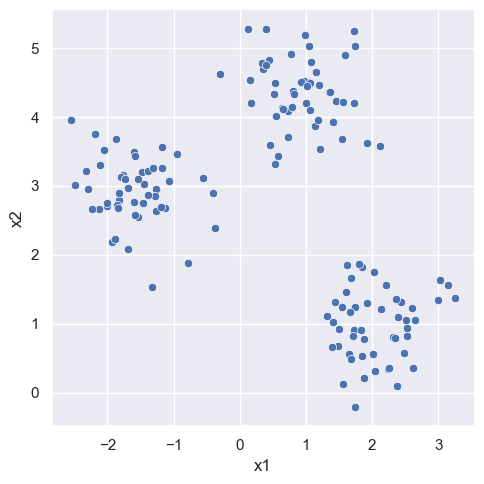

In [1]:
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# toy dataset
X, y = make_blobs(
   n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0
)

data_toy = pd.DataFrame(X)
data_toy.columns = ['x1','x2']
data_toy = pd.DataFrame(data_toy).assign(cl = y)
sns.relplot(x='x1', y='x2', data = data_toy)

## $k-$means

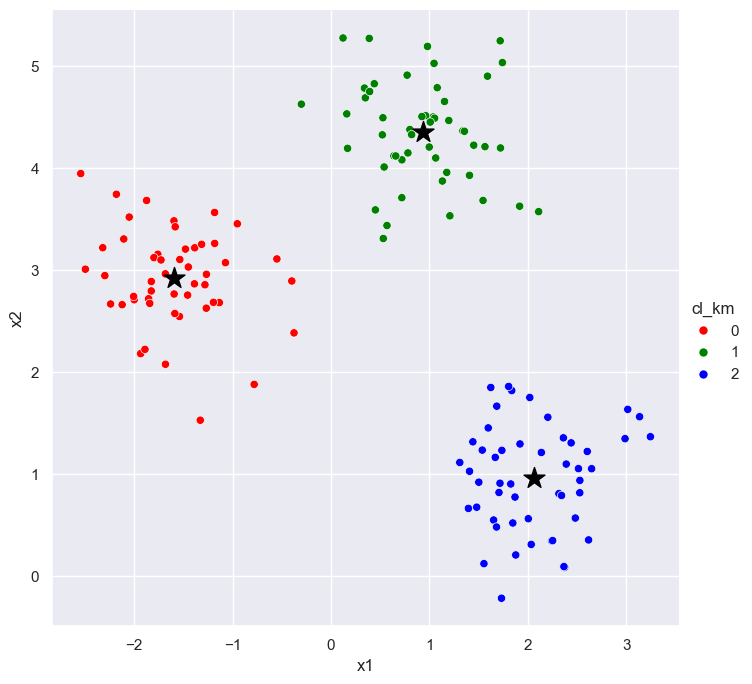

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = kmeans.fit_predict(X)

data_toy_km = pd.DataFrame(data_toy).assign(cl_km = y_km)

custom_palette = ["red", "green", "blue"]
sns.relplot(x='x1', y='x2', data = data_toy_km, hue='cl_km', height=7, palette = custom_palette,
           legend = 'brief')

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='centroids'
)
#plt.legend(scatterpoints=1)
plt.show()

### Una pista del número de clusters. Elbow
### clusters vs W(c), disim. dentro de clusters

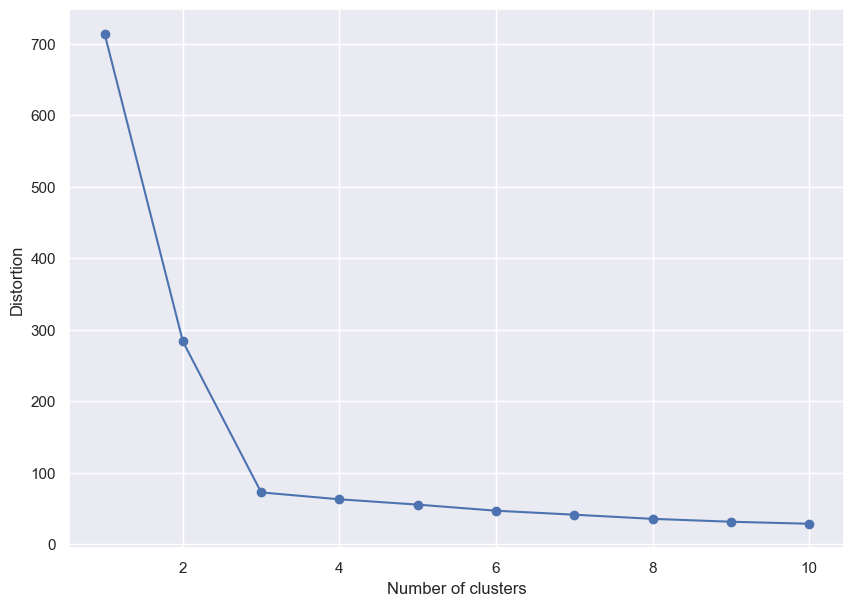

In [3]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## Gráfico de siluetas

/Users/vmac/virtualenv/ml24/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vmac/virtualenv/ml24/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vmac/virtualenv/ml24/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.5848706144251782
For n_clusters = 3 The average silhouette_score is : 0.7143417887288687
For n_clusters = 4 The average silhouette_score is : 0.5768508858868746


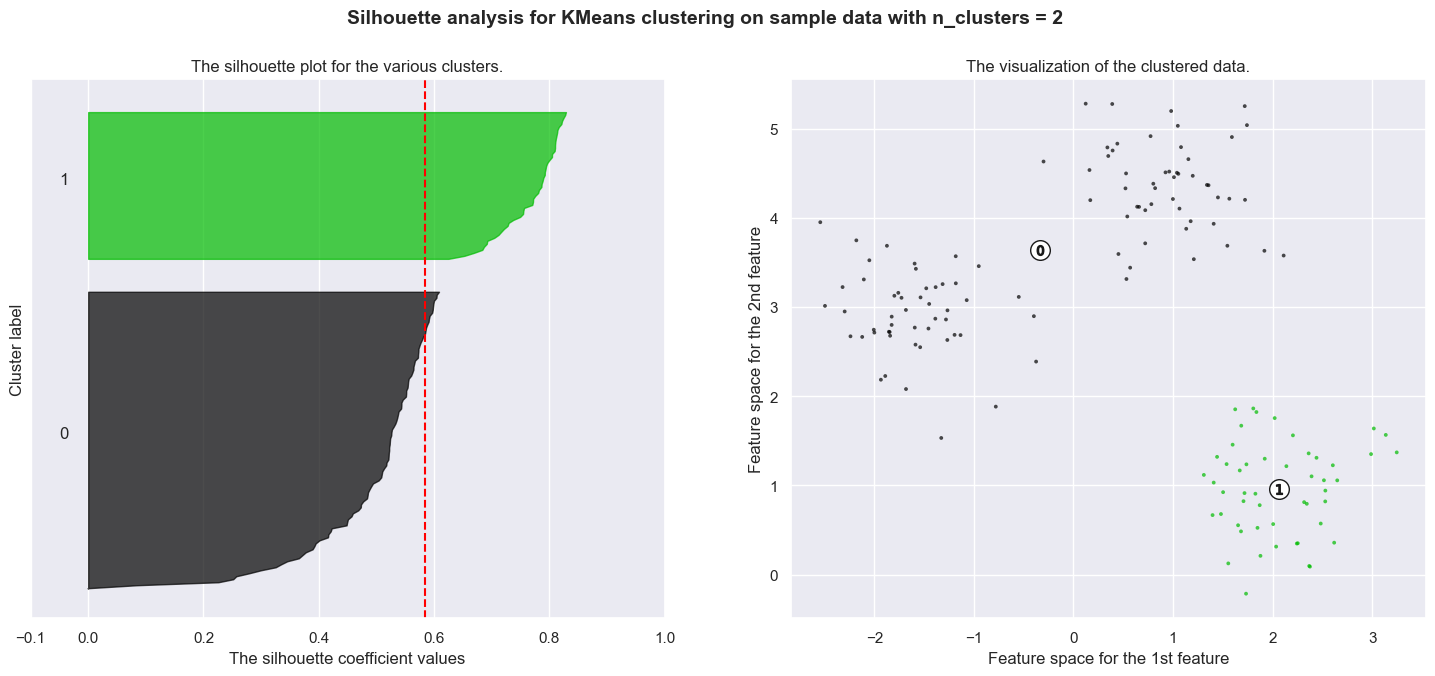

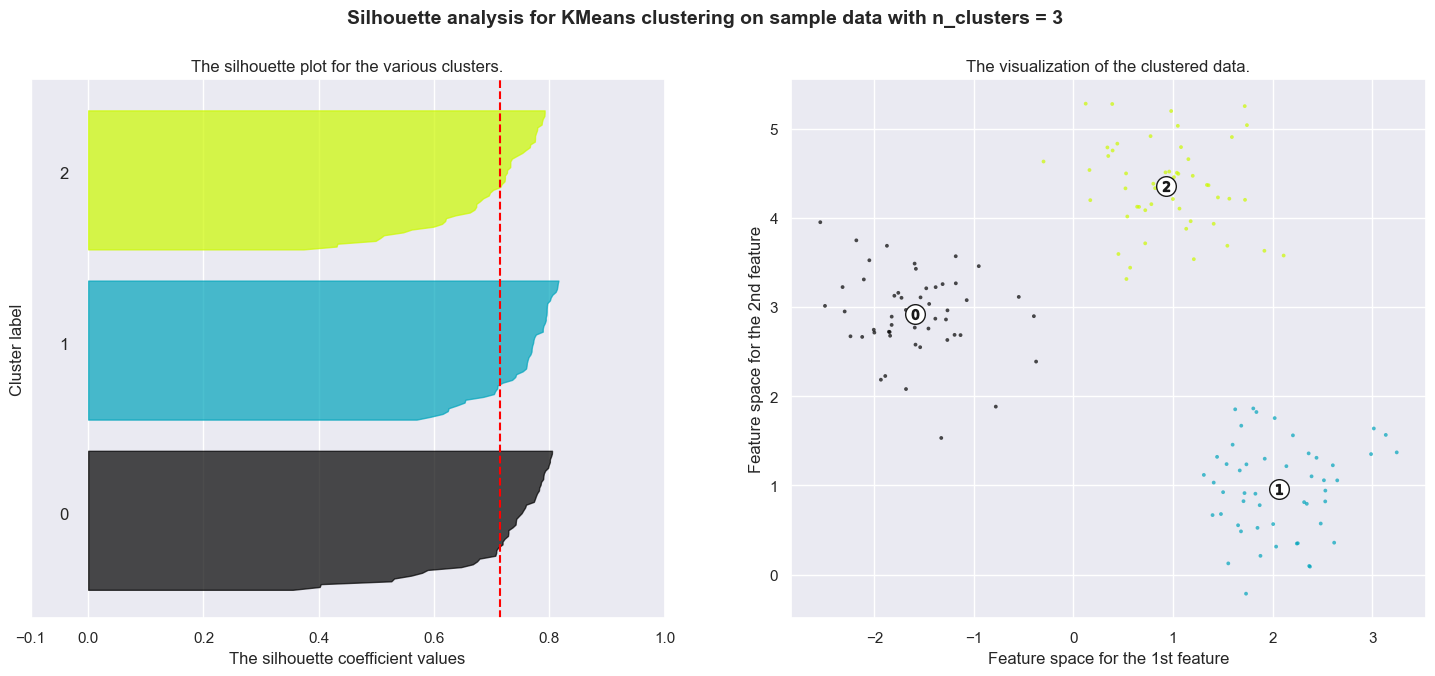

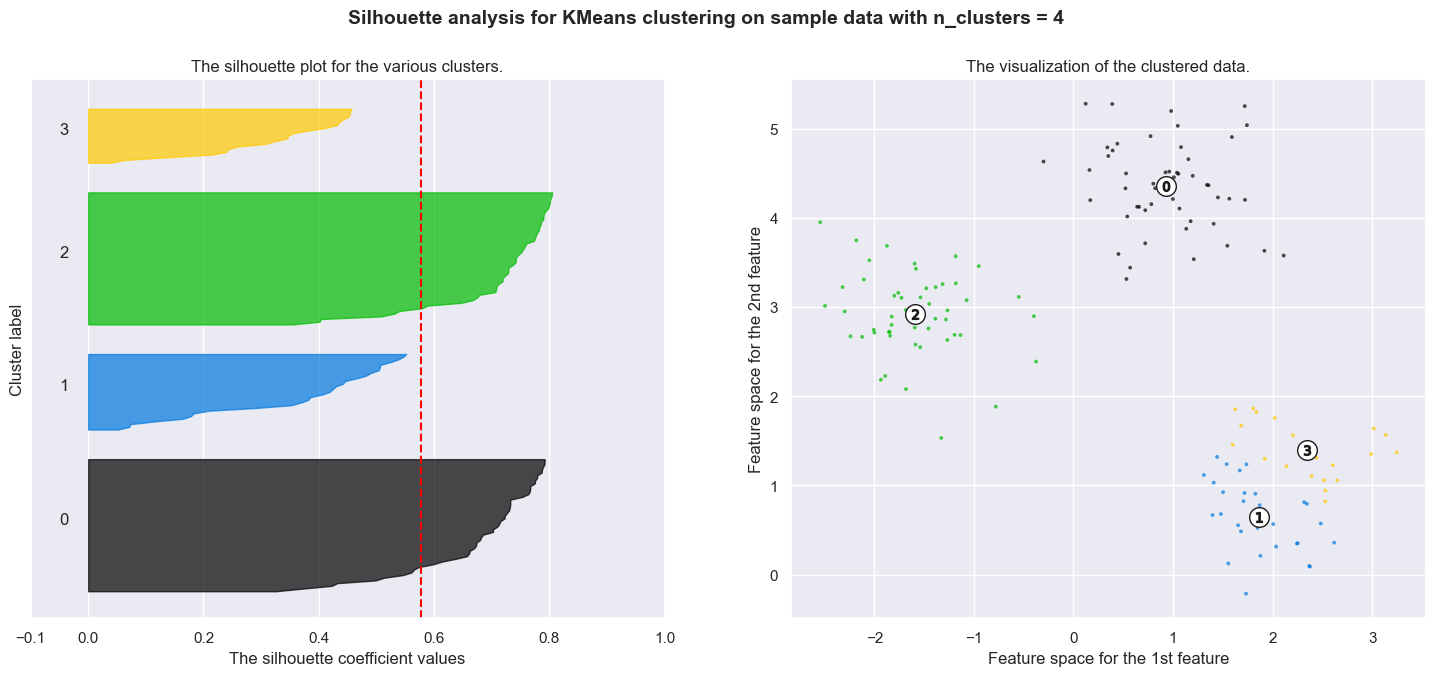

In [4]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Subplot (1 row, 2 columns)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot es el grafico de silueta
    # Observa que, el coeficiente de silueta está en [-1,1], pero para visualizar mejor los datos
    # lo ponemos en [-0.1, 1], ya que en este ejemplo todos caen en ese rango
    ax1.set_xlim([-0.1, 1])
    
    # ponemos un margen de (n_clusters+1)*10 entre cada silueta individual para
    # cada cluster 
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # instanciamos un objeto de KMeans, especificando n_clusters en el constructor
    # fijamos la semilla (random_state) para poder reproducir el resultado
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # el silhouette_score es el valor promedio para cada muestra ($\bar{s}_K$ en la notación de clase)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # valor de silueta para cada observacion
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # agregar el score silhouette scores para las observaciones que caen en el cluster i
        # y se ordenan
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # etiquetas de los silhouette plots
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # pone el score average silhouette como una linea puteada en rojo
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # El segundo grafico muestra los clusters formados 
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    # grafica centroides
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## $k-$medoids

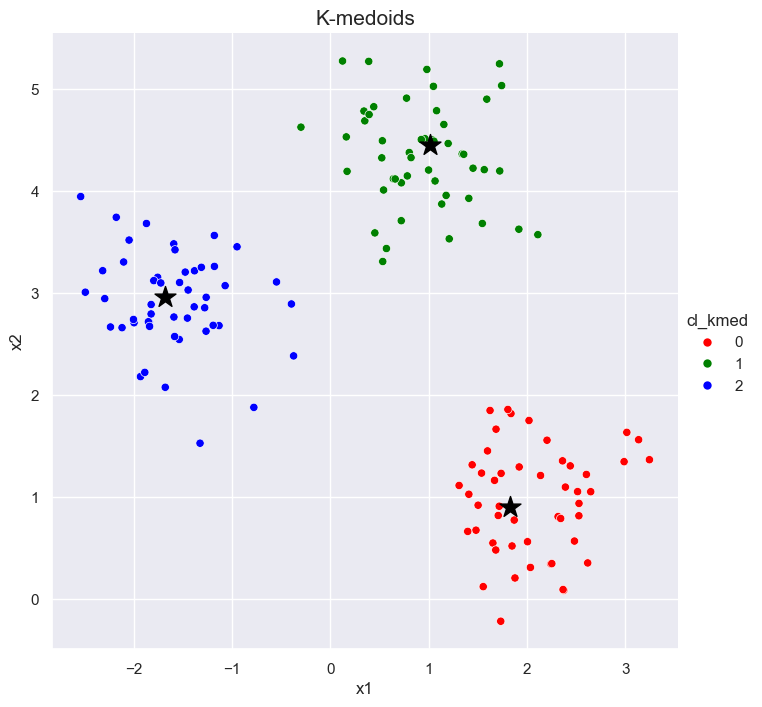

In [6]:
#pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=3, random_state=0)
kmedoids.fit(X)

data_toy_kmed = pd.DataFrame(data_toy).assign(cl_kmed = kmedoids.labels_)

custom_palette = ["red", "green", "blue"]
sns.relplot(x='x1', y='x2', data = data_toy_kmed, hue='cl_kmed', height=7, palette = custom_palette,
           legend = 'brief')
plt.title("K-medoids", fontsize=15)
# plot the centroids
plt.scatter(
    kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='centroids'
)

Compáralo con el resultado de $k-$means:

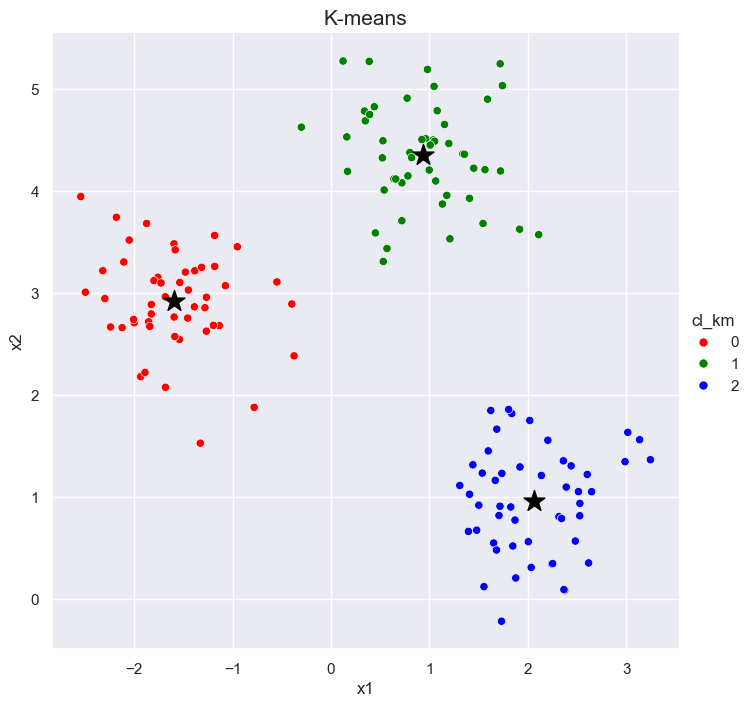

In [7]:
sns.relplot(x='x1', y='x2', data = data_toy_km, hue='cl_km', height=7, palette = custom_palette,
           legend = 'brief')
plt.title("K-means", fontsize=15)
# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='centroids'
)

#plt.legend(scatterpoints=1)
#plt.show()

## Fuzzy $k-$means

Pongo dos opciones de implementación:
- `fuzzy-c-means`: https://pypi.org/project/fuzzy-c-means/
- `sklearn_extensions`: https://pypi.org/project/sklearn-extensions/

In [11]:
#pip install fuzzy-c-means
from fcmeans import FCM

# m es el parámetro de fuzyness
fcm = FCM(n_clusters=3, m=2)
fcm.fit(X)
probs = np.round(fcm.soft_predict(X),3)
lab = np.matrix(fcm.predict(X)).T
data_toy_fkm = pd.DataFrame(np.concatenate((data_toy,probs,lab),axis=1))
data_toy_fkm.columns = ['x1','x2','cl','p0','p1','p2','cl_fkm']
print(data_toy_fkm.to_string())

           x1        x2   cl     p0     p1     p2  cl_fkm
0    2.605097  1.225296  1.0  0.017  0.029  0.954     2.0
1    0.532377  3.313389  0.0  0.184  0.704  0.112     1.0
2    0.802314  4.381962  0.0  0.002  0.997  0.001     1.0
3    0.528537  4.497239  0.0  0.025  0.964  0.012     1.0
4    2.618585  0.357698  1.0  0.026  0.034  0.941     2.0
5    1.591415  4.904977  0.0  0.047  0.911  0.042     1.0
6    1.742660  5.038467  0.0  0.063  0.879  0.059     1.0
7    2.375333  0.089186  1.0  0.033  0.039  0.928     2.0
8   -2.121334  2.664474  2.0  0.959  0.026  0.015     0.0
9    1.720396  5.251732  0.0  0.074  0.860  0.066     1.0
10   3.136885  1.565928  1.0  0.053  0.103  0.843     2.0
11  -0.374946  2.387874  2.0  0.638  0.212  0.149     0.0
12  -1.845623  2.719246  2.0  0.985  0.009  0.005     0.0
13   0.721444  4.084750  0.0  0.017  0.973  0.010     1.0
14   0.161171  4.535178  0.0  0.095  0.872  0.033     1.0
15  -1.999127  2.712857  2.0  0.974  0.017  0.010     0.0
16  -1.478042 

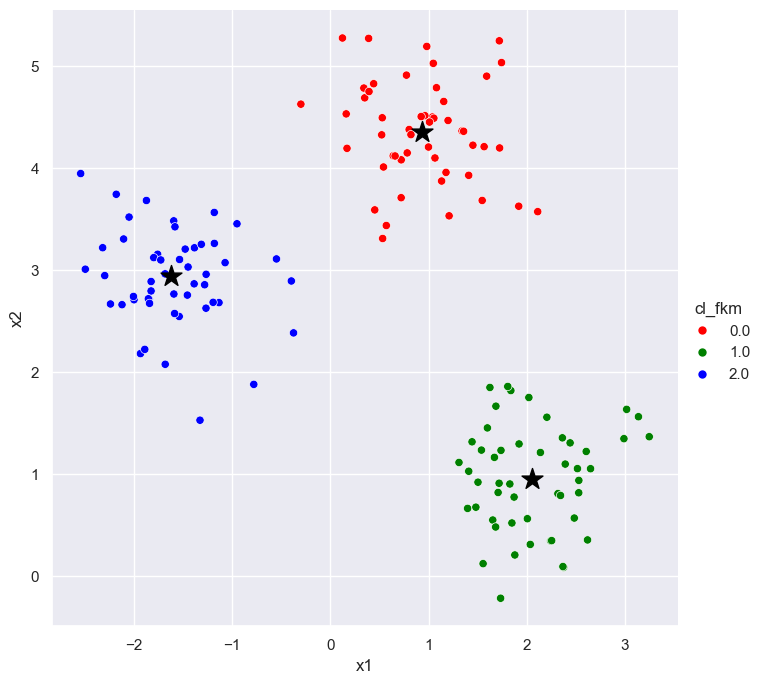

In [9]:
custom_palette = ["red", "green", "blue"]
sns.relplot(x='x1', y='x2', data = data_toy_fkm, hue='cl_fkm', height=7, palette = custom_palette, legend = 'auto')

# plot the centroids
plt.scatter(fcm.centers[:, 0],fcm.centers[:, 1], s=250, marker='*', c='black', edgecolor='black',label='centroids')
plt.show()

In [10]:
#pip install sklearn-extensions
from sklearn_extensions.fuzzy_kmeans import FuzzyKMeans
# m es el parámetro de fuzyness
fuzzy_kmeans = FuzzyKMeans(k=3, m=2)
fuzzy_kmeans.fit(X)
#dir(fuzzy_kmeans)
res = pd.DataFrame(np.round(fuzzy_kmeans.fuzzy_labels_,3)).assign(label=fuzzy_kmeans.labels_)
print(res.to_string())

ModuleNotFoundError: No module named 'sklearn.datasets.samples_generator'

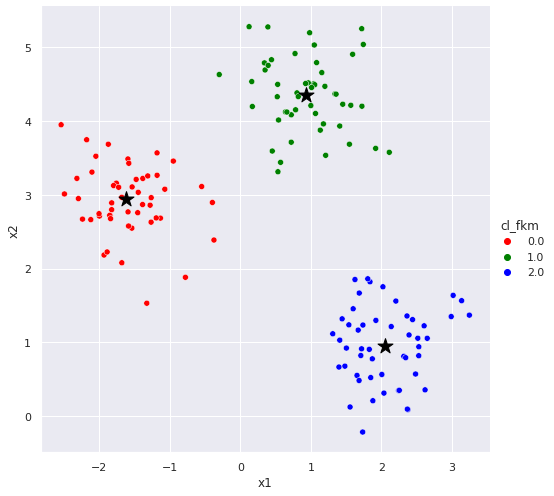

In [70]:
data_toy_kmed = pd.DataFrame(data_toy).assign(cl_fkm = fuzzy_kmeans.labels_)
custom_palette = ["red", "green", "blue"]
sns.relplot(x='x1', y='x2', data = data_toy_fkm, hue='cl_fkm', height=7, palette = custom_palette,
           legend = 'brief')

# plot the centroids
plt.scatter(
    fuzzy_kmeans.cluster_centers_[:, 0], fuzzy_kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='centroids'
)
#plt.legend(scatterpoints=1)
plt.show()